In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
import datetime

#import data

Products = pd.read_csv('/Users/francoiselawrence/Documents/Kevin/Product.csv')

EndUser = pd.read_csv('/Users/francoiselawrence/Documents/Kevin/EndUser.csv')

Invoice = pd.read_csv('/Users/francoiselawrence/Documents/Kevin/Invoice.csv')

Vendor = pd.read_csv('/Users/francoiselawrence/Documents/Kevin/Vendor.csv')

Invoice.head()

,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
0,UK,07/15/2019,E5ED03155812D08AF95C0DE6C6CFC756,1,74B2CFB8460D047F00CEC531319C7768,3285.863338,6,68D292A10256DB24405C56738F34D976
1,UK,06/06/2019,060AFA0DDB5F61AE58689DE4E1C45F66,1,9A5264F9ED8507F6F31112E24917452D,418.152176,1,4B39A21A1DD7881D4E165B9E90A4B831
2,UK,04/04/2019,95F78CBA7E223D0441DBE5EC9139C534,1,42A3AE06A8DC14FF62FDA90A55292CAA,60.578612,1,BE572735EA42E603C64667A191FAB9F6
3,UK,02/20/2019,14104E4FCCE6B2BF8A3CC8321DC1B5AE,1,F5B5DB9152AEE5BC633DEF60AC30203D,69.704712,6,E781130707853D0407533FC5433CF0BB
4,UK,11/07/2019,1176EAEA7C94F29A0335D9A5EE9D2A0D,1,59343B86E5B56460844F92C4A87ED4D1,566.165348,1,B9B2476B6EBE1C6657CACC1C836BDF6C


In [2]:
Products

,Unnamed: 0,COUNTRY_CODE,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C
1,1,UK,0B4CAAB42250CD60262F82B4D73C3635,SHEET FEEDER FOR 3X550P A3/A FOR A3 PAGEWIDE M...,PRINTER/COPIER/FAX,PRINTER/PLOTTER ACCS,FD238FE2F00C1CB45BC1BF5106BBFFA3
2,2,UK,9D2AB6F326BCF44B4F98CF39E9BA79BC,BEHIND THE MONITOR MOUNT E-SERIES 2016 MONITORS,DISPLAYS,MONITOR ACCESSORIES,D884DD6EF46F75F75813D3A32CBCF4ED
3,3,UK,5CDB1C91BDB30E55EBE8618D3583BD5E,"1U FIXED 19"" ADJUSTABLE DEPTH UNIVERSAL SERVER...",ACCESSORIES,RACKS,46C21159A8F5C14CE3E0085965B23026
4,4,UK,F3BA51033611624FC45B4BEEE1B6B1A4,STEPHEN GOULD BLUETOOTH HEADSET FOR DRAGON NAT...,MULTIMEDIA & GAMES,COMPUTER HEADSETS,79507CB23FDC8CB6CCFAC9E3EE2275A1
...,...,...,...,...,...,...,...
32059,32059,UK,503DB5C937B25435F930E5D03100EDE0,HP 205A ORIGINAL CYAN LASERJET TONER CARTRIDGE,CONSUMABLES,COLOR LASER TONER,65046A55D0688E0727F17C7A20CF6E79
32060,32060,UK,4B5563843BD0ADC90BE65B7B2ED6E90C,MYCLOUD PR4100 40TB 3.5IN 4BAY 4X10TB ...,HIGH END STORAGE,RAID SYSTEMS,334DDC602A6F90ED81795A8A6FDAB75C
32061,32061,UK,418B49CF1A1A8B1C3151518A48090DC4,6 SHIELDED EXTERNAL ESATA CABLE M/M,CABLES,SATA/ESATA CABLE&AD,06010D621D32E49419833240D39EB125
32062,32062,UK,4947175F80BEAEC81CA81F43189C6E86,USB-C TO GIGABIT ETHERNET ADAP IN,COMMUN/NETWORKING,NETWORK ADAPTERS,00623950E7A7186A5F3DD48562DA65AB


In [3]:
#import combined dataset

#data = pd.read_csv('E:/UCI/winter/298/new/Capstone.csv')


In [4]:
#data

I = Invoice.groupby('END_USER_ID')['UNITE_PRICE_$'].apply(sum)
J = pd.DataFrame({'END_USER_ID':I.index, 'TOTAL_SPENT':I.values})
Invoice = pd.merge(Invoice, J,on='END_USER_ID')

data = pd.merge(Products, Vendor,on='VENDOR_ID')
data = pd.merge(data, Invoice,on='PRODUCT_ID')
data = pd.merge(data, EndUser,on='END_USER_ID')
data.head()


,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006


In [5]:
#bin annual sales
pd.qcut(data['ANNUAL_SALES'], q=3)

0          (73842408.0, 278397000000.0]
1          (73842408.0, 278397000000.0]
2          (73842408.0, 278397000000.0]
3          (73842408.0, 278397000000.0]
4          (73842408.0, 278397000000.0]
                       ...             
1127005              (0.999, 2111946.0]
1127006                             NaN
1127007                             NaN
1127008              (0.999, 2111946.0]
1127009              (0.999, 2111946.0]
Name: ANNUAL_SALES, Length: 1127010, dtype: category
Categories (3, interval[float64]): [(0.999, 2111946.0] < (2111946.0, 73842408.0] < (73842408.0, 278397000000.0]]

In [6]:
data['total_spent_bin'] = pd.qcut(data['TOTAL_SPENT'], q=3)
data['Annual_Sales_bin'] = pd.qcut(data['ANNUAL_SALES'], q=3)

In [7]:
d2= data.drop_duplicates(subset = ['PRODUCT_ID','END_USER_ID'], keep = 'last')

In [8]:
d4= data.drop_duplicates(subset = ['VENDOR_ID','END_USER_ID'], keep = 'last')

In [9]:
## get a list of all users and the products they purchased
productsPerUser = d2.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
PPU = pd.DataFrame({'END_USER_ID':productsPerUser.index, 'Products':productsPerUser.values})
PPU

,END_USER_ID,Products
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9]
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50]
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603..."
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01..."
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1..."
...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD]
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2]
148460,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50]
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC..."


In [10]:
VendorPerUser = d4.groupby("END_USER_ID")["VENDOR_ID"].apply(list)
VPU= pd.DataFrame({'END_USER_ID':VendorPerUser.index, 'Vendor':VendorPerUser.values})
VPU

,END_USER_ID,Vendor
0,000132B479F0F56A47249E8093C7C180,[7ED5AB2BFA4C55BD87D00B17B4A4D970]
1,00017609D0C74E6CE907CFF9111F412E,[C76DA52B2FCE23F1949FAAC059A27E44]
2,0001CCEEC0E80598BB94ACC3247E7710,"[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9..."
3,000242D514CE9634091A121F64F972FB,[ADFBBD3C396430AD163CC304E95FE5A7]
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2..."
...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[300D8636ADA68AAA8F7D2494D70BC330]
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[11CA995A4746A5BB9A6C08B284DC8DA0]
148460,FFFF75E2F481CE59842E7139776CAAAD,[300D8636ADA68AAA8F7D2494D70BC330]
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4..."


In [11]:
d3 = data[['END_USER_ID','total_spent_bin']].drop_duplicates(subset = ['END_USER_ID','total_spent_bin'])
d3

,END_USER_ID,total_spent_bin
0,0DF9912E0B03F1B29912720999323F3C,"(709053.885, 48269844.737]"
15892,A0FDB4C93FD46033CC782AA1DD83D78E,"(709053.885, 48269844.737]"
23333,4FD0E289560F5AF8CDF2664A68FDAF12,"(709053.885, 48269844.737]"
26010,FBEFFA3FE060AF057CEA1574CD25DF20,"(7279.18, 709053.885]"
26235,D35367187F19EF4EEB3677869177E469,"(7279.18, 709053.885]"
...,...,...
1127005,B1F5EFF9FF2A89EE6932BBC293D2E7AB,"(9.001000000000001, 7279.18]"
1127006,53F5AA6A5F01D9362137FA674BA9AF8C,"(9.001000000000001, 7279.18]"
1127007,107FE731E5F1ECD71AFEEA7317FC1106,"(9.001000000000001, 7279.18]"
1127008,4C22DB3BC32A03A66C6690A7F08DA42E,"(9.001000000000001, 7279.18]"


In [12]:

#frames = [PPU, VPU, SPU]

result = pd.merge(PPU, VPU, on='END_USER_ID')
#result = pd.merge(result, SPU, on='END_USER_ID')
result = pd.merge(result, EndUser, on='END_USER_ID')

result['Annual_Sales_bin'] = pd.qcut(result['ANNUAL_SALES'], q=3)

result = pd.merge(result, d3, on='END_USER_ID')
result

,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9],[7ED5AB2BFA4C55BD87D00B17B4A4D970],65309,UK,NaN,Services,Legal Services,Legal Services,<20,188958.0,2019,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50],[C76DA52B2FCE23F1949FAAC059A27E44],12548,UK,BELFAST,Wholesale Trade,Wholesale Trade-durable Goods,"Machinery, Equipment, And Supplies",<20,1287474.0,2000,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603...","[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9...",92729,UK,DERBYSHIRE,Retail Trade,Miscellaneous Retail,"Retail Stores, Not Elsewhere Classified",UNKNOWN,154042987.0,2004,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01...",[ADFBBD3C396430AD163CC304E95FE5A7],68297,UK,CHESHIRE,Retail Trade,Miscellaneous Retail,Nonstore Retailers,<20,52419.0,2012,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1...","[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2...",86623,UK,SURREY,Services,Legal Services,Legal Services,<20,58147.0,2014,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD],[300D8636ADA68AAA8F7D2494D70BC330],95470,UK,KENT,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,263993.0,1991,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2],[11CA995A4746A5BB9A6C08B284DC8DA0],125925,UK,WEST YORKSHIRE,Services,Social Services,Individual And Family Social Services,100-249,4954109.0,2008,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"
148460,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50],[300D8636ADA68AAA8F7D2494D70BC330],44297,UK,HAMPSHIRE,Public Administration,Nonclassifiable Establishments,Nonclassifiable Establishments,UNKNOWN,NaN,2014,NaN,"(9.001000000000001, 7279.18]"
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC...","[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4...",45595,UK,HERTFORDSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",<20,203046.0,2018,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"


In [13]:
result.columns


Index(['END_USER_ID', 'Products', 'Vendor', 'Unnamed: 0', 'COUNTRY_CODE',
       'STATE', 'Business_CAT_LEVEL_1', 'Business_CAT_LEVEL_2',
       'Business_CAT_LEVEL_3', 'EMPLOYEES_BIN', 'ANNUAL_SALES', 'YEAR_STARTED',
       'Annual_Sales_bin', 'total_spent_bin'],
      dtype='object')

In [14]:
#result[result.END_USER_ID == '0002A1EF533B2E30C136BD9E0B3C7F90']

In [15]:
#split
#def narrow(userID):
#    m = result[result.END_USER_ID == userID]["total_spent_bin"]
#    print(m)

In [16]:
#narrow("3062445D06E69CED2A2EEF8E35169B88")

In [14]:
#get accurcies
#random sample

import random 
random.seed(123)

sample = result.sample(250).END_USER_ID.tolist()
accurcies = pd.DataFrame({'UserID': sample})
#build graph

#sample
#accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy(x))
accurcies

,UserID
0,065A11B0DF1E8FDDDD33DA14072BADAE
1,8DF5E5C71CF498E791F0099A4A7606AE
2,203F07475EC133C7927CE5ACEB11979B
3,CED6CBB05C15DD9C570509EF279C96A9
4,74395E637A6EF1D1C265482F0FF55BDC
...,...
245,49332623B65B9C8C7B278548C44F096D
246,3FD289354BD9A30C2DBD4A145894786F
247,1E789C87EAC4E3720AE4EF2E877D9D50
248,846C7259011C9E85775A2B2A59F56DBF


In [15]:
#accurcies.to_csv('/Users/Kevin/Downloads/sample.csv', index=False)

In [16]:
#replace with empty list
#result.Products[4][1] = [str(j).replace(j," ") for j in result.Products[4] if j == 'D075CB4D4A17EF5FADE27790BC19A5D9']

In [17]:
import networkx as nx
import time

# Load the graph by adding nodes and edges

G = nx.Graph(label="END_USER_ID")
start_time = time.time()
for i, rowi in result.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    #G.add_node(rowi['name'],key=rowi['id'],label="name",mtype=rowi['category'],rating=rowi['rating'])
    element1 = rowi['END_USER_ID']
    G.add_node(element1,label="USER")
    G.add_edge(rowi['END_USER_ID'], element1, label="USER")
        
    element2 = rowi['STATE']
    G.add_node(element2,label="STATE")
    G.add_edge(rowi['END_USER_ID'], element2, label="STATE")
    
    element3 = rowi['Business_CAT_LEVEL_1']
    G.add_node(element3,label="CATL1")
    G.add_edge(rowi['END_USER_ID'], element3, label="CATL1")
    
    element4 = rowi['Business_CAT_LEVEL_2']
    G.add_node(element4,label="CATL2")
    G.add_edge(rowi['END_USER_ID'], element4, label="CATL2")
    
    element5 = rowi['Business_CAT_LEVEL_3']
    G.add_node(element5,label="CATL3")
    G.add_edge(rowi['END_USER_ID'], element5, label="CATL3")
    
    element6 = rowi['EMPLOYEES_BIN']
    G.add_node(element6,label="BIN")
    G.add_edge(rowi['END_USER_ID'], element6, label="BIN")
    
    element7 = rowi['total_spent_bin']
    G.add_node(element7,label="TOTAL")
    G.add_edge(rowi['END_USER_ID'], element7, label="TOTAL")
    
    element8 = rowi['Products']
    if element8 != 0:
        for j in element8:
            G.add_node(j,label="PRODUCT")
            G.add_edge(rowi['END_USER_ID'], j, label="PRODUCT")
        
    element9 = rowi['Vendor']
    for k in element9:
        G.add_node(k,label="VENDOR")
        G.add_edge(rowi['END_USER_ID'], k, label="VENDOR")
        
    element10 = rowi['Annual_Sales_bin']
    G.add_node(element10,label="ANNUAL")
    G.add_edge(rowi['END_USER_ID'], element10, label="ANNUAL")
    
    
    #indices = find_similar(tfidf, i, top_n = 5)
    #snode="Sim("+rowi['END_USER_ID'][:15].strip()+")"        
    #G.add_node(snode,label="SIMILAR")
    #G.add_edge(rowi['END_USER_ID'], snode, label="SIMILARITY")
    #for element in indices:
    #    G.add_edge(snode, Products['END_USER_ID'].loc[element], label="SIMILARITY")
    

print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.38535499572753906 seconds --
 iter 1000 -- 0.6168069839477539 seconds --
 iter 2000 -- 0.8064849376678467 seconds --
 iter 3000 -- 0.9941709041595459 seconds --
 iter 4000 -- 1.1669037342071533 seconds --
 iter 5000 -- 1.36985182762146 seconds --
 iter 6000 -- 1.575042724609375 seconds --
 iter 7000 -- 1.759563684463501 seconds --
 iter 8000 -- 1.937504768371582 seconds --
 iter 9000 -- 2.107193946838379 seconds --
 iter 10000 -- 2.275714874267578 seconds --
 iter 11000 -- 2.469393014907837 seconds --
 iter 12000 -- 2.635098934173584 seconds --
 iter 13000 -- 2.8178000450134277 seconds --
 iter 14000 -- 2.9825947284698486 seconds --
 iter 15000 -- 3.163465976715088 seconds --
 iter 16000 -- 3.373224973678589 seconds --
 iter 17000 -- 3.5805718898773193 seconds --
 iter 18000 -- 3.777660846710205 seconds --
 iter 19000 -- 3.9301528930664062 seconds --
 iter 20000 -- 4.0887250900268555 seconds --
 iter 21000 -- 4.245725870132446 seconds --
 iter 22000 -- 4.410123825073242 se

In [18]:
#Function to combine the edges and nodes for plotting
import matplotlib.pyplot as plt

def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="USER":
            colors.append('yellow')
        elif G.nodes[e]['label']=="STATE":
            colors.append('red')
        elif G.nodes[e]['label']=="CATL1":
            colors.append('green')
        elif G.nodes[e]['label']=="CATL2":
            colors.append('pink')
        elif G.nodes[e]['label']=="CATL3":
            colors.append('orange')
        elif G.nodes[e]['label']=="BIN":
            colors.append('purple')
        elif G.nodes[e]['label']=="TOTAL":
            colors.append('brown')
        elif G.nodes[e]['label']=="PRODUCT":
            colors.append('blue')
        elif G.nodes[e]['label']=="VENDOR":
            colors.append('black')
        elif G.nodes[e]['label']=="ANNUAL":
            colors.append('cyan')



            
    plt.figure(figsize = (25,20))
    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors, node_size=900)
    plt.show()

In [19]:
import math as math
#Function to calculate similiarity between 2 users
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="USER":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    USER=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        USER.append(key)
        weight.append(w)
    #ratings = list(np.float_(ratings))
    #recommendation = pd.Dataframe(data=np.array(weight),index=products)
    #recommendation = pd.DataFrame(data=np.array(weight),columns=["products","rating"])
    #recommendation.to_frame()
    d = {"Name": USER, "Closeness": weight}
    recommendation = pd.DataFrame(d)
    recommendation.sort_values(by= ["Closeness"], inplace=True,ascending=False)
    recommendation = recommendation.head(5)
    return recommendation;

In [20]:
import math as math
#Function to calculate similiarity between 2 users
def get_recommendation2(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="USER":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    USER=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        USER.append(key)
        weight.append(w)
    #ratings = list(np.float_(ratings))
    #recommendation = pd.Dataframe(data=np.array(weight),index=products)
    #recommendation = pd.DataFrame(data=np.array(weight),columns=["products","rating"])
    #recommendation.to_frame()
    d = {"Name": USER, "Closeness": weight}
    recommendation = pd.DataFrame(d)
    recommendation.sort_values(by= ["Closeness"], inplace=True,ascending=False)
    
    # GET BUISNESS CATEGORY of user
    incat =  list(result[result.END_USER_ID == root].Business_CAT_LEVEL_3)

    #get dataframe in buisness cat 3
    r2 = result[result.Business_CAT_LEVEL_3.isin(incat)]

    #get all users in buisness cat3
    n2 = r2.END_USER_ID.tolist()

    #filter out all close users that dont share same buisness cat
    recommendation = recommendation[ recommendation.Name.isin(n2)]
    
    recommendation = recommendation.head(5)
    return recommendation;

In [21]:
# test reccomendations based on users
recommendation = get_recommendation("3062445D06E69CED2A2EEF8E35169B88")
print("*"*40+"\n Recommendation for '3062445D06E69CED2A2EEF8E35169B88'\n"+"*"*40)
print(recommendation)
recommendation2 = get_recommendation2("3062445D06E69CED2A2EEF8E35169B88")
print("*"*40+"\n Recommendation for '3062445D06E69CED2A2EEF8E35169B88'\n"+"*"*40)
print(recommendation2)

****************************************
 Recommendation for '3062445D06E69CED2A2EEF8E35169B88'
****************************************
                                   Name  Closeness
16934  F8B283D3C56FF8873CCC4B175569E199   0.919918
10299  91E9E26442E3A4E7B5488EBFDC26361D   0.900962
6449   5652E6746AD7AD34B4A3FA217649339A   0.900962
2347   166A85D3F48ACA30B8D964F915B783EF   0.858923
14176  CF46B7B14A2C4936AD4732F3B608AE0D   0.854818
****************************************
 Recommendation for '3062445D06E69CED2A2EEF8E35169B88'
****************************************
                                   Name  Closeness
10299  91E9E26442E3A4E7B5488EBFDC26361D   0.900962
6449   5652E6746AD7AD34B4A3FA217649339A   0.900962
792    EB89C235611CCE18B2C48B1A96DD3BF4   0.765737
741    DEBCAB427098DBA2AF6C747F8071DBC7   0.765737
864    FF0C606A4218D19CAB2CF531F0868E68   0.765737


In [22]:
r = recommendation2

In [23]:
user = "3062445D06E69CED2A2EEF8E35169B88"

# GET BUISNESS CATEGORY of user
incat =  list(result[result.END_USER_ID == user].Business_CAT_LEVEL_3)

#get dataframe in buisness cat 3
r2 = result[result.Business_CAT_LEVEL_3.isin(incat)]


n2 = r2.END_USER_ID.tolist()
n2

r[r.Name.isin(n2)].head(5)

,Name,Closeness
10299,91E9E26442E3A4E7B5488EBFDC26361D,0.900962
6449,5652E6746AD7AD34B4A3FA217649339A,0.900962
792,EB89C235611CCE18B2C48B1A96DD3BF4,0.765737
741,DEBCAB427098DBA2AF6C747F8071DBC7,0.765737
864,FF0C606A4218D19CAB2CF531F0868E68,0.765737


In [24]:
result[result.END_USER_ID == 'F8B283D3C56FF8873CCC4B175569E199']

,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
144199,F8B283D3C56FF8873CCC4B175569E199,"[CBA2FB7E4B9DCE43AF4E1CF8B7357AA9, 2862B9DB5EC...","[C175D3A2F00FB52E8DA252B12DAF1621, EC323269CAF...",22354,UK,SOUTH YORKSHIRE,Retail Trade,Eating And Drinking Places,Eating And Drinking Places,<20,1297512.0,2012,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"


In [25]:
result[result.END_USER_ID == '91E9E26442E3A4E7B5488EBFDC26361D']

,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
84527,91E9E26442E3A4E7B5488EBFDC26361D,"[EDD524D7E05E3437842F65DCFE01D563, 3866ACD2BF9...","[7A07BB33C6152690B88E290F6914F5A6, 5808D4F4E2A...",125785,UK,LEICESTERSHIRE,Retail Trade,Miscellaneous Retail,"Retail Stores, Not Elsewhere Classified",250-499,27625055.0,2010,"(2219646.0, 278397000000.0]","(7279.18, 709053.885]"


In [26]:
#Close users search in PPU 
#Product Recommendation
def productRec(UserID, test):
    recommendation = get_recommendation(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list

    freq = {}

    for items in flat_list:
        freq[items] = flat_list.count(items)

    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]

    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)

    return rec

In [27]:
### Close users search in PPU 
#Product Recommendation
def productRec3(UserID, test):
    recommendation = get_recommendation2(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()
    


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list
    
    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]
    
    #reccomend products of intrest to customers
    b = Products[Products.PRODUCT_ID.isin(y2)].PRODUCT_CAT.tolist()
    b2 = list(set(b))
    a = Products[Products.PRODUCT_ID.isin(k)]
    boolean_series = a.PRODUCT_CAT.isin(b2)
    a2 = a[boolean_series].PRODUCT_ID.tolist()

    freq = {}

    for items in a2:
        freq[items] = flat_list.count(items)


    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)
    
   
    return rec

In [28]:
#Close users search in PPU 
#Product Recommendation
def productRec1(UserID, test):
    recommendation = get_recommendation(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()
    


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list
    
    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]
    
    #reccomend products of intrest to customers
    b = Products[Products.PRODUCT_ID.isin(y2)].PRODUCT_CAT.tolist()
    b2 = list(set(b))
    a = Products[Products.PRODUCT_ID.isin(k)]
    boolean_series = a.PRODUCT_CAT.isin(b2)
    a2 = a[boolean_series].PRODUCT_ID.tolist()

    freq = {}

    for items in a2:
        freq[items] = flat_list.count(items)


    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)
    
   
    return rec

In [29]:
 productRec1("3062445D06E69CED2A2EEF8E35169B88", 0)

,ProductID,Count
24,6955DEF805149A6C15E7A67D17BDDFBC,3
0,CCA5D8A412C7530EB7400D5AAEF6B085,2
12,68F5500C34BA6584E1A926910D092D82,2
26,77A338B7D1D0BE9C53A8993D63CAB5B5,2
25,74A16F37550B9E9377F57587DCC9A437,2
22,6C3C23D736FFF2861AEAD0ADA24FD9AA,2
20,A43D81146AFB76CAE3F5C29C7EAA95D6,2
19,6C5796C06FA53D73D78CA73D2F3E014D,2
15,12411A3B5796341B6B1CE8291EDA99D3,2
1,338EF7294888FD8950F8FEDEBE71AE97,2


In [30]:
Products[Products.PRODUCT_ID == '610A6F0941DA7499E23B68E7CA271086']

,Unnamed: 0,COUNTRY_CODE,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID
9068,9068,UK,610A6F0941DA7499E23B68E7CA271086,PRIMO CHAT HEADSET FOR PC AND LAPTOP ...,MULTIMEDIA & GAMES,COMPUTER HEADSETS,1DE7ED54EC516EF1A869D7C979626837


In [31]:
def getAccuracy(UserID):
    R = productRec(UserID, 1)
    PPU2 = PPU[PPU.END_USER_ID == UserID].iloc[0]
    count = 0
    for i in R.ProductID:
        if i in (PPU2.Products):
            count +=1
    accuracy = count
    print('something')
    return accuracy

In [32]:
def getAccuracy2(UserID):
    R = productRec1(UserID, 1)
    PPU2 = PPU[PPU.END_USER_ID == UserID].iloc[0]
    count = 0
    for i in R.ProductID:
        if i in (PPU2.Products):
            count +=1
    accuracy = count
    print('something')
    return accuracy

In [33]:
def getAccuracy3(UserID):
    R = productRec3(UserID, 1)
    PPU2 = PPU[PPU.END_USER_ID == UserID].iloc[0]
    count = 0
    for i in R.ProductID:
        if i in (PPU2.Products):
            count +=1
    accuracy = count
    print('something')
    return accuracy

In [34]:
accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy(x))
accurcies

something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something


,UserID,Accuracy
0,065A11B0DF1E8FDDDD33DA14072BADAE,1
1,8DF5E5C71CF498E791F0099A4A7606AE,1
2,203F07475EC133C7927CE5ACEB11979B,1
3,CED6CBB05C15DD9C570509EF279C96A9,1
4,74395E637A6EF1D1C265482F0FF55BDC,1
...,...,...
245,49332623B65B9C8C7B278548C44F096D,2
246,3FD289354BD9A30C2DBD4A145894786F,0
247,1E789C87EAC4E3720AE4EF2E877D9D50,1
248,846C7259011C9E85775A2B2A59F56DBF,2


In [35]:
accurcies["Accuracy"].mean()

1.008

In [36]:
accurcies["Accuracy"].sum()

252

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

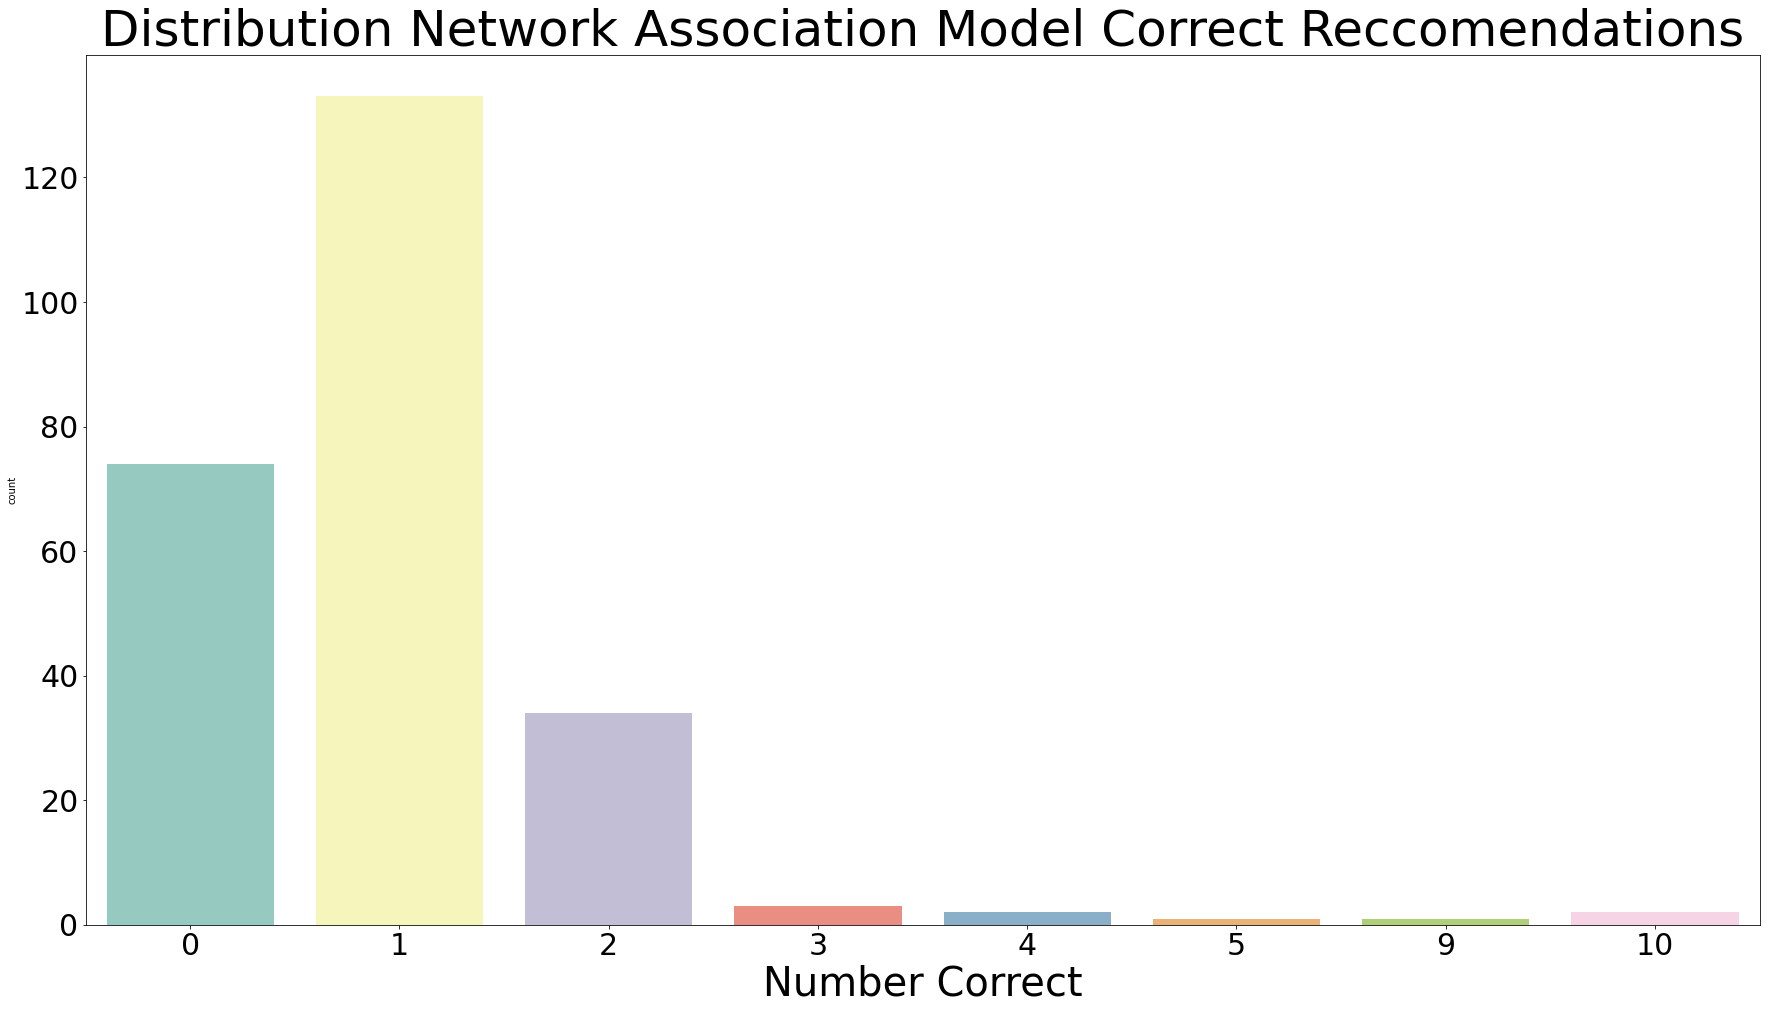

In [38]:
#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution Network Association Model Correct Reccomendations",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

In [39]:
accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy2(x))
accurcies

something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something


,UserID,Accuracy
0,065A11B0DF1E8FDDDD33DA14072BADAE,1
1,8DF5E5C71CF498E791F0099A4A7606AE,1
2,203F07475EC133C7927CE5ACEB11979B,1
3,CED6CBB05C15DD9C570509EF279C96A9,1
4,74395E637A6EF1D1C265482F0FF55BDC,1
...,...,...
245,49332623B65B9C8C7B278548C44F096D,2
246,3FD289354BD9A30C2DBD4A145894786F,0
247,1E789C87EAC4E3720AE4EF2E877D9D50,1
248,846C7259011C9E85775A2B2A59F56DBF,2


In [40]:
## narrow down better
accurcies["Accuracy"].mean()

1.096

In [41]:
accurcies["Accuracy"].sum()

274

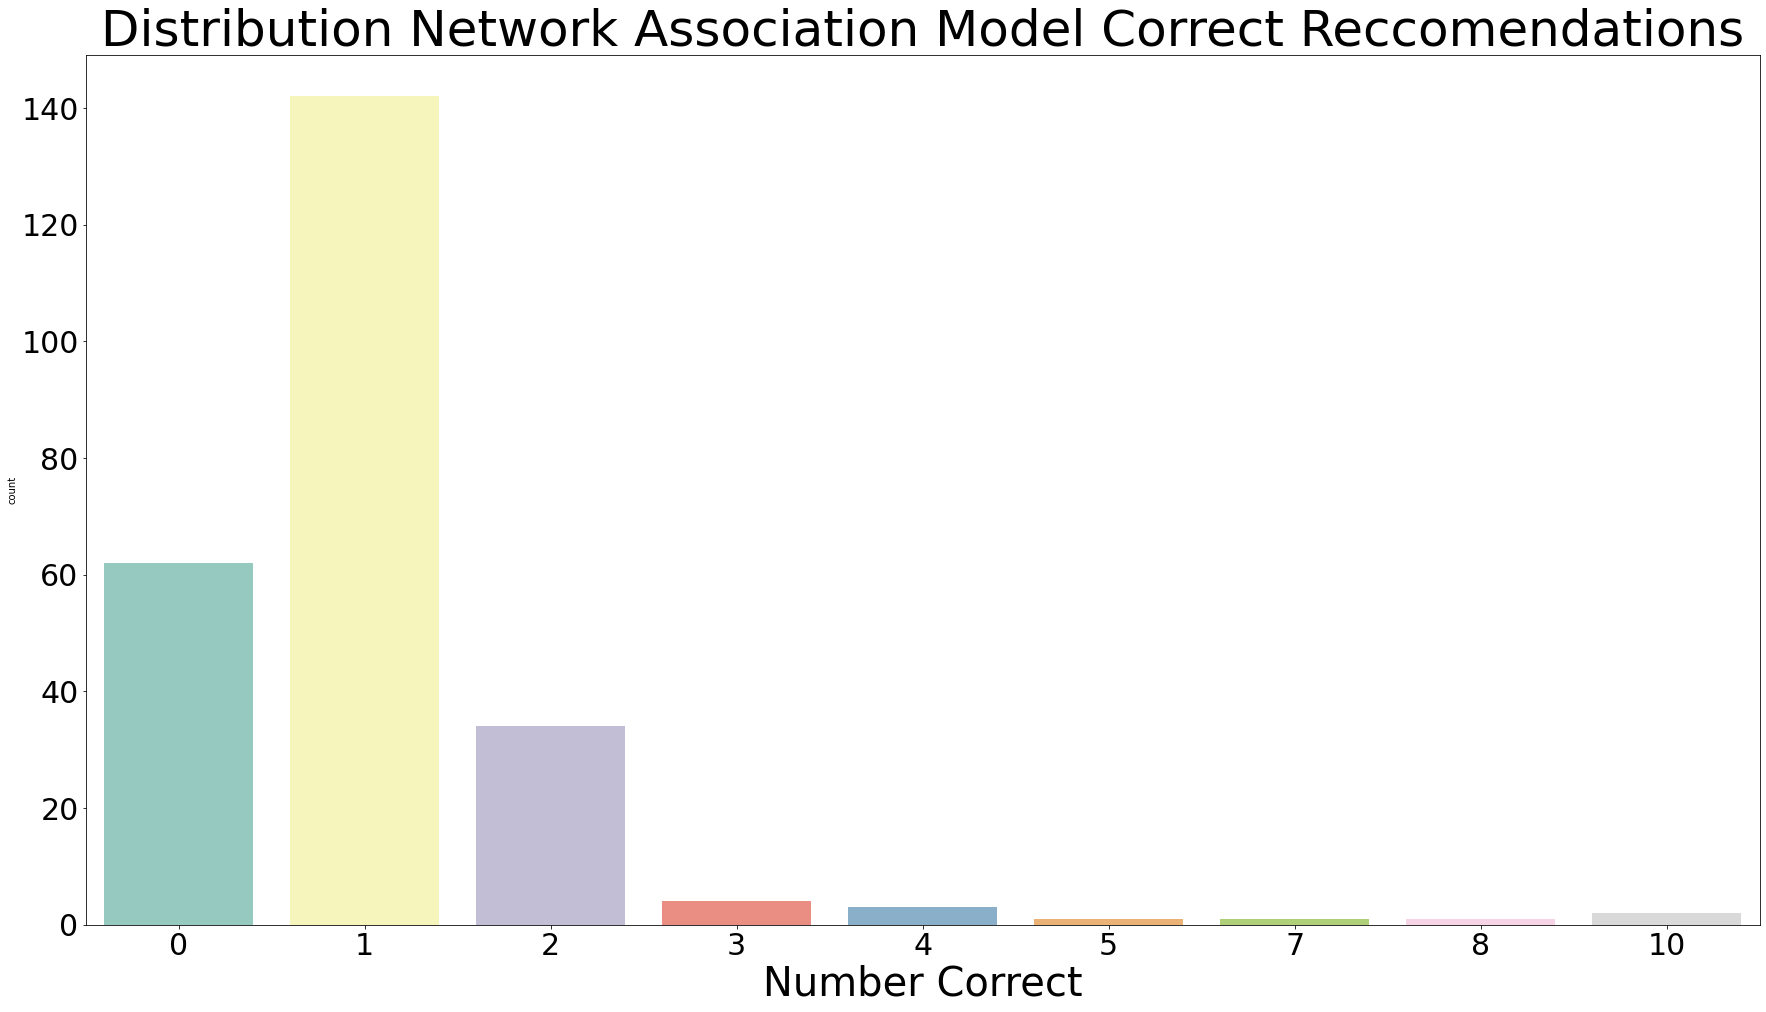

In [42]:
#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution Network Association Model Correct Reccomendations",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

In [43]:
accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy3(x))
accurcies

something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something


,UserID,Accuracy
0,065A11B0DF1E8FDDDD33DA14072BADAE,1
1,8DF5E5C71CF498E791F0099A4A7606AE,0
2,203F07475EC133C7927CE5ACEB11979B,0
3,CED6CBB05C15DD9C570509EF279C96A9,0
4,74395E637A6EF1D1C265482F0FF55BDC,1
...,...,...
245,49332623B65B9C8C7B278548C44F096D,2
246,3FD289354BD9A30C2DBD4A145894786F,0
247,1E789C87EAC4E3720AE4EF2E877D9D50,0
248,846C7259011C9E85775A2B2A59F56DBF,1


In [44]:
## narrow down better
accurcies["Accuracy"].mean()

0.92

In [45]:
accurcies["Accuracy"].sum()

230

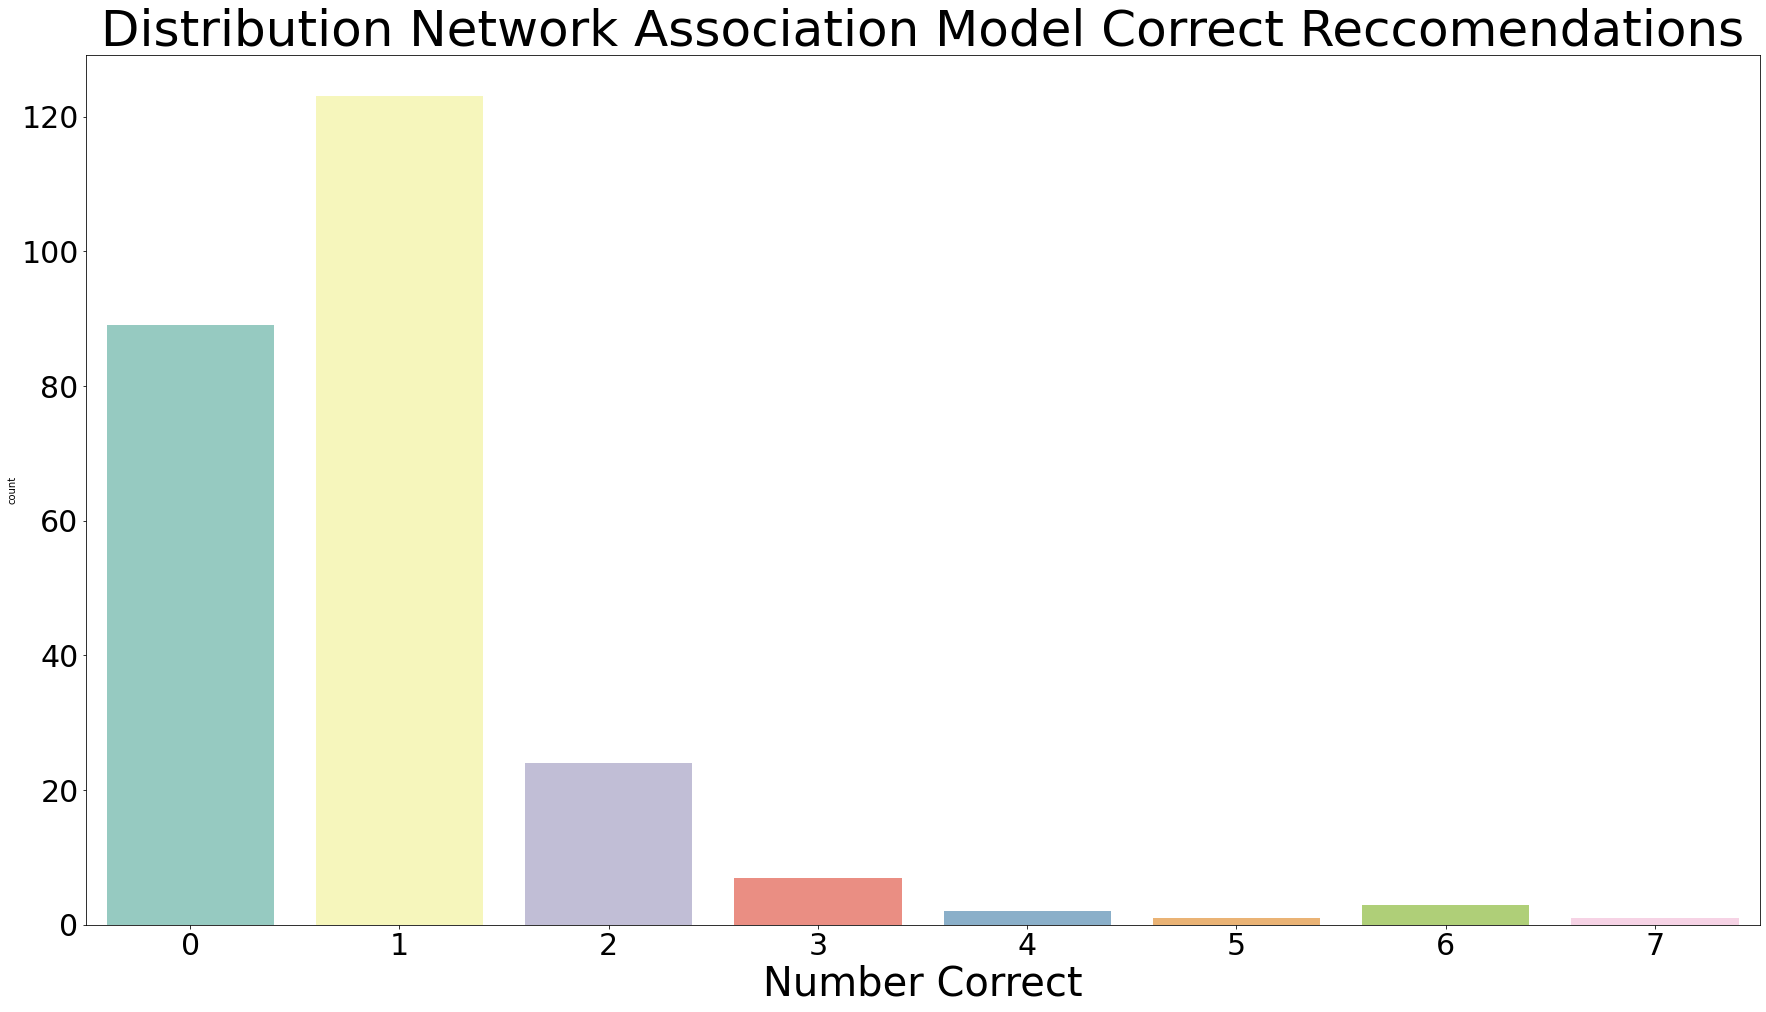

In [46]:
#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution Network Association Model Correct Reccomendations",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

In [47]:
accurcies.to_csv('/Users/francoiselawrence/Documents/Kevin/sample1.csv', index=False)

In [48]:
bs = data.groupby('END_USER_ID')['TOTAL_SPENT'].unique()
big = pd.DataFrame({'User':bs.index, 'Spent':bs.values})
big = big.sort_values(['Spent'], ascending=False).head(250)

## sample top 250 biggest spending customers

input1 = big.User.tolist()

input1

['1B687BB46A12C38B38F7770CEADC72B7',
 '0DF9912E0B03F1B29912720999323F3C',
 '12FCE09D18CD0DD9A9A164BECB8456A0',
 '289CEEF05EDEB05B2D6FB02D7C20B6D5',
 'D8931ED111FD020D02EB20FA71CF55EB',
 '18ED49A1CBA4E9CE96F1212E78B10D04',
 '925EFFA0882BB778382EBD65F8DEBB14',
 '336D42B71A053A221B7C4D6456D2F50B',
 '7D1C583D275E7CC9C94DE0A9B82AA2F8',
 '4FD0E289560F5AF8CDF2664A68FDAF12',
 'ACA9B42B12A5A9786A2127EA47D75471',
 'F2CCC2975F1C9E69BA5B630675A3F9C0',
 '8C5A07E9984142E44F4FD0AADFC8D202',
 'A0FDB4C93FD46033CC782AA1DD83D78E',
 'B38A91FC2ED3C7E25CB9846674C39945',
 '4874F478AC2ECF6F173C43549A70FBD7',
 '60072D5CD2630FB5044952B966DB7C81',
 '02B9DE307FD181AC051C5FCC603550D4',
 'B24848B742B40286F6743280437B221F',
 'F1AE4E7FB6890A282D141C789F136584',
 'BE76DE046F08EF15842F3422F2DEA0AD',
 'FA265725798287F30ECDA6084A186A0F',
 '6CC27D3B00482FFC8B45EAA5C1377325',
 '5BD39A7D806527C260139410A1416821',
 '206108913DCF05D5EC1A44E621545163',
 'CD1DC7EBEF0CA50FA01881EC0897207A',
 'ED0E0E9ECCFD3EAD449597F7D6E46EE5',
 

In [49]:
accurcies = pd.DataFrame({'UserID': input1})
accurcies

,UserID
0,1B687BB46A12C38B38F7770CEADC72B7
1,0DF9912E0B03F1B29912720999323F3C
2,12FCE09D18CD0DD9A9A164BECB8456A0
3,289CEEF05EDEB05B2D6FB02D7C20B6D5
4,D8931ED111FD020D02EB20FA71CF55EB
...,...
245,9CD77EA1CBC477E69F0BF936221AC408
246,F471A673BDCFC0B6F10833F9FD9DC7D6
247,03D94E6173C8DBD00EED9214FC6C9CA4
248,F23489449C35E7E8E434C4972521C270


In [50]:
accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy2(x))
accurcies

something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something


,UserID,Accuracy
0,1B687BB46A12C38B38F7770CEADC72B7,9
1,0DF9912E0B03F1B29912720999323F3C,5
2,12FCE09D18CD0DD9A9A164BECB8456A0,8
3,289CEEF05EDEB05B2D6FB02D7C20B6D5,10
4,D8931ED111FD020D02EB20FA71CF55EB,2
...,...,...
245,9CD77EA1CBC477E69F0BF936221AC408,0
246,F471A673BDCFC0B6F10833F9FD9DC7D6,1
247,03D94E6173C8DBD00EED9214FC6C9CA4,2
248,F23489449C35E7E8E434C4972521C270,3


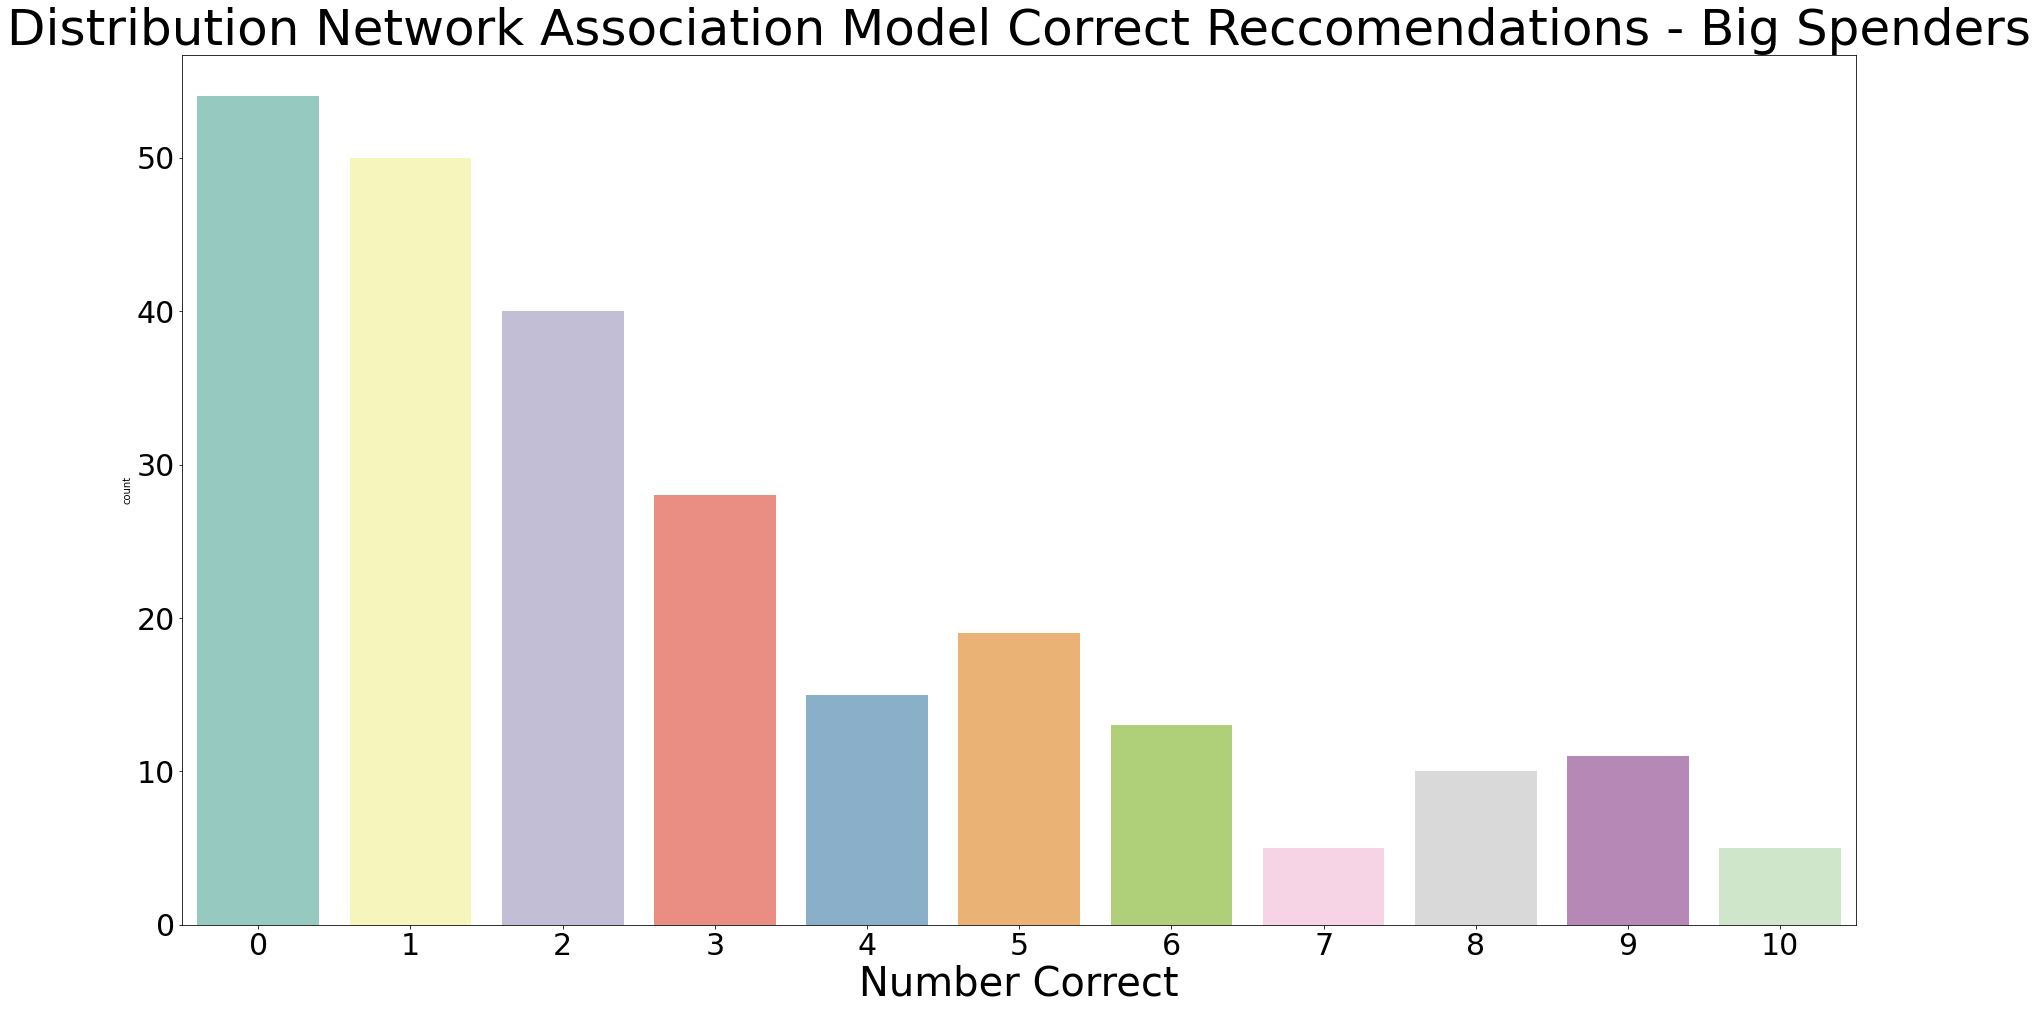

In [51]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution Network Association Model Correct Reccomendations - Big Spenders",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

In [52]:
accurcies["Accuracy"].mean()

2.844

In [53]:
accurcies["Accuracy"].sum()

711

In [ ]:
VPU[VPU.END_USER_ID == '91E9E26442E3A4E7B5488EBFDC26361D'].Vendor.tolist()[0]

In [ ]:
#plot network diagram by testing it with products to view similiarity patterns & what connects the two users together
#if cust in test set, we are assuming they didn't buy anything

list_in=["5FF24AF43D4A1B8367498FE3D09E2A0C",'289CEEF05EDEB05B2D6FB02D7C20B6D5']
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [ ]:
#plot another
list_in=["85030F0580A71693F2152588A8CD4B90","771435C4BC7001E95449BFE8C7641690"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [ ]:
#look at customers that bought similiar products 
#get users 
#group by enduser
#add products that they bought: show one row per user 
#use EndUser and add everything we need to it: product id, total spent, vendor id, 

#get top 5 users, remove those items that they already bought, get accuracy
#if end user id in the list it will return products and remove all the current user bought already

#come up with rating system:



#replace products nodes that they prchased, replace with 0. Assume they didnt buy it before 

In [ ]:
How can we handle new customers? #new cust not in dataset
new product #update it